In [197]:
# Add the relevant scripts from LArMachineLearningData
# Nice the process so it can run with lots of cores on low priority
import os
os.nice(20)

# Add local paths
import sys
hnlDIR = os.environ['_']
sys.path.append('../pyscript')

# From pyscript Library
from Plotting import *
from Dictionary import *
from HelperFunctions import *
from CutFunctions import *

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec

import warnings
warnings.filterwarnings("ignore")

In [198]:
ifTune = False
ifSave = True
savePath = "../plot_files/06Feb24/"

<h1> Read in PKL Dataframe </h1>

<h3>HNL</h3>

In [199]:
hnl_path = "./df_hnl.pkl"

file = open(hnl_path, 'rb')
df_hnl = pickle.load(file)
file.close
del hnl_path

In [200]:
df_hnl = df_hnl[["run", "subrun", "event", "slc_idx", "scale_pot", "mod_t", 'slc_comp', 'slc_true_event_type']]

<h3>TPC Neutrino</h3>

In [201]:
nu_path = "./df_nu.pkl"

file = open(nu_path, 'rb')
df_nu = pickle.load(file)
file.close
del nu_path

In [202]:
df_nu = df_nu[["run", "subrun", "event", "slc_idx", "scale_pot", "mod_t", 'slc_comp', 'slc_true_event_type']]

<h3>Intime Cosmics</h3>

In [203]:
cos_path = "./df_cos.pkl"

file = open(cos_path, 'rb')
df_cos = pickle.load(file)
file.close
del cos_path

In [204]:
df_cos = df_cos[["run", "subrun", "event", "slc_idx", "scale_pot", "mod_t", 'slc_comp', 'slc_true_event_type']]

<h1> Load Flux Systematics</h1>

<h3> HNL </h3>

In [205]:
dfflxw_hnl = pd.DataFrame()

for i in range(0, 2):
    hnl_path = "../pkl_files/hnl_m200_50k__flxw_{}.pkl".format(i)
    print(hnl_path)
    
    file = open(hnl_path, 'rb')
    df = pickle.load(file)
    
    df = df.merge(df_hnl, how='inner', on=['run','subrun','event','slc_idx'])
    
    dfflxw_hnl = pd.concat((dfflxw_hnl, df), ignore_index=True)
    file.close()
    
df_hnl = dfflxw_hnl

del dfflxw_hnl

../pkl_files/hnl_m200_50k__flxw_0.pkl
../pkl_files/hnl_m200_50k__flxw_1.pkl


<h3> TPC Neutrino </h3>

In [206]:
dfflxw_nu = pd.DataFrame()

for i in range(0, 4):
    nu_path = "../pkl_files/nu_tpc_100k_flxw_{}.pkl".format(i)
    print(nu_path)
    
    file = open(nu_path, 'rb')
    df = pickle.load(file)
    
    df = df.merge(df_nu, how='inner', on=['run','subrun','event','slc_idx'])
    
    dfflxw_nu = pd.concat((dfflxw_nu, df), ignore_index=True)
    file.close()
    
df_nu = dfflxw_nu

del dfflxw_nu

../pkl_files/nu_tpc_100k_flxw_0.pkl
../pkl_files/nu_tpc_100k_flxw_1.pkl
../pkl_files/nu_tpc_100k_flxw_2.pkl
../pkl_files/nu_tpc_100k_flxw_3.pkl


<h1>Plot Flux Weights</h1>

In [225]:
flux_list = ['slc_flux_weight_expskin'
                ,'slc_flux_weight_horncurrent'
                ,'slc_flux_weight_kminus'
                ,'slc_flux_weight_kplus'
                ,'slc_flux_weight_kzero'
                ,'slc_flux_weight_nucleoninexsec'
                ,'slc_flux_weight_nucleonqexsec'
                ,'slc_flux_weight_nucleontotxsec'
                ,'slc_flux_weight_piminus'
                ,'slc_flux_weight_pioninexsex'
                ,'slc_flux_weight_pionqexsec'
                ,'slc_flux_weight_piontotxsec'
                ,'slc_flux_weight_piplus'
                ]

flux_name = ['Exposure Skin Flux Weight'
                ,'Horn Current Flux Weight'
                ,'Kaon Minus Flux Weight'
                ,'Kaon Plus Flux Weight'
                ,'Neutral Kaon Flux Weight'
                ,'Nucleon Ineslastic Cross Section Flux Weight'
                ,'Nucleon Quasi-Elastic Cross Section Flux Weight'
                ,'Nucleon Total Cross Section Flux Weight'
                ,'Pion Minus Flux Weight'
                ,'Pion Inelastic Cross Section Flux Weight'
                ,'Pion Quasi-Elastic Cross Section Flux Weight'
                ,'Pion Total Cross Section Flux Weight'
                ,'Pion Plus Flux Weight'
                ]

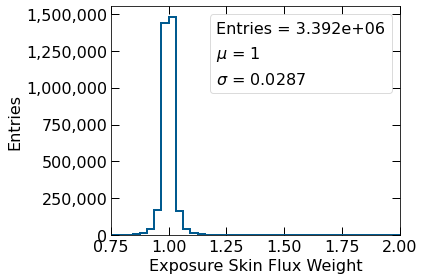

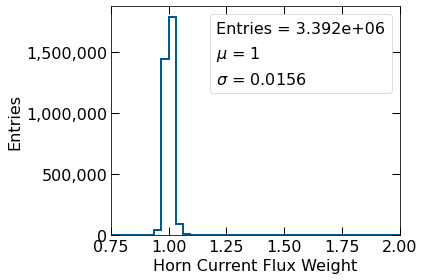

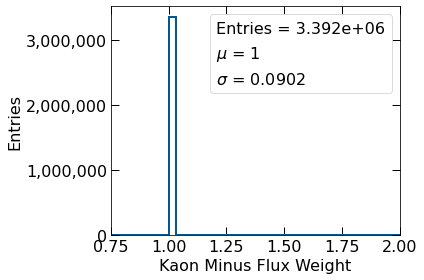

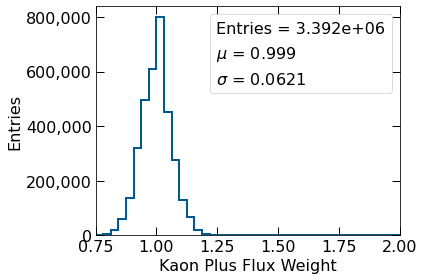

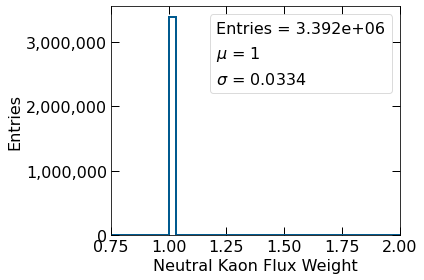

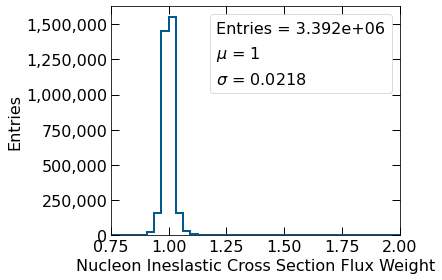

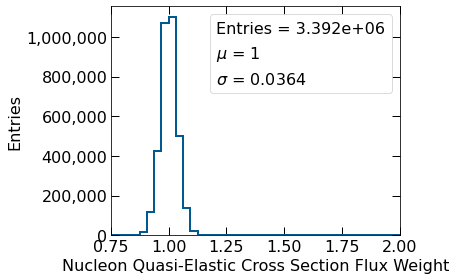

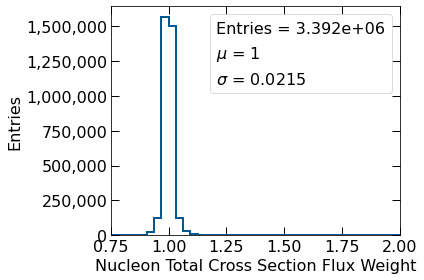

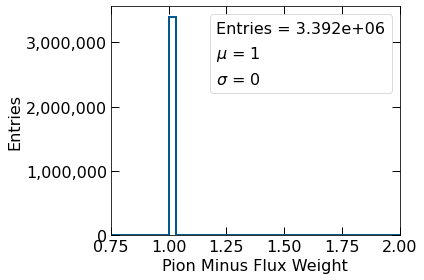

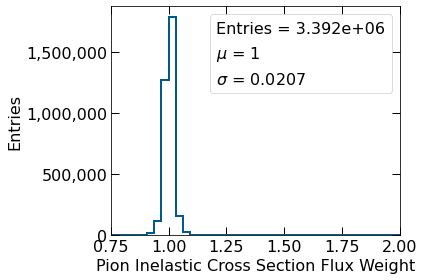

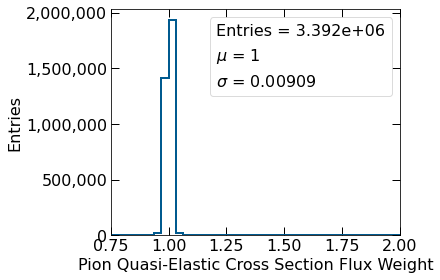

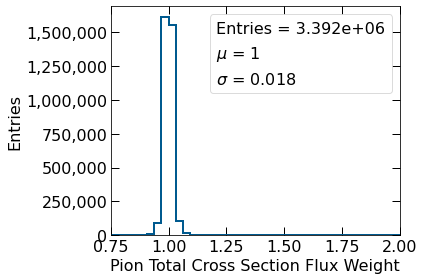

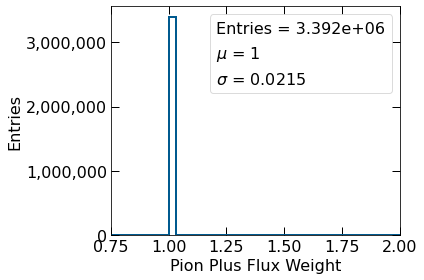

In [245]:
for var, name in zip(flux_list, flux_name):
    pltdf = df_hnl[var]

    pltdf = pltdf.explode()
    
    fig, ax1 = plt.subplots(1, figsize = (6,4))
    xmin=0.75
    xmax=2
    xnbin=40
    xlimmin = xmin
    xlimmax = xmax
    plot_1dhist( pltdf, 
                ax1,
                xmin, xmax, xnbin,
                xlimmin, xlimmax,
                ifnorm =False,
                histtype = 'step',
                linecolor = col_dict['Teal'], linewidth = 2,
                xtitle = name, ytitle = "Entries",
                ifstatbox = True, loc = 'best'
                )
    fig.tight_layout()
    if ifSave:
        plt.savefig(savePath+var+".png", dpi=200)
        
    plt.show()

<h1>Save The Universes Of Flux Weights</h1>

In [230]:
def check_flxw(x):
    if len(x['slc_flux_weight_expskin']) < 1000:
        print('run {0:} subrun {1:} event {2:} slc idx {3:}'.format(x['run'],x['subrun'],x['event'],x['slc_idx']))

In [231]:
def time_flxw(x):
    w_arr = []
    
    if len(x['slc_flux_weight_expskin']) < 1000:
        w_arr.append(1)
    else:
        for i in range(0, 1000):
            w = x['slc_flux_weight_expskin'][i] \
                * x['slc_flux_weight_horncurrent'][i] \
                * x['slc_flux_weight_kminus'][i] \
                * x['slc_flux_weight_kplus'][i] \
                * x['slc_flux_weight_kzero'][i] \
                * x['slc_flux_weight_nucleoninexsec'][i] \
                * x['slc_flux_weight_nucleonqexsec'][i] \
                * x['slc_flux_weight_nucleontotxsec'][i] \
                * x['slc_flux_weight_piminus'][i] \
                * x['slc_flux_weight_pioninexsex'][i] \
                * x['slc_flux_weight_pionqexsec'][i] \
                * x['slc_flux_weight_piontotxsec'][i] \
                * x['slc_flux_weight_piplus'][i] 
            
            w_arr.append(w)
    

    return w_arr

In [ ]:
def make_df_flxw(df):
    
    #time all the flux weight together since they're correlated
    df['flxw'] = df.apply(lambda row: time_flxw(row), axis = 1)
    
    #drop no longer used columns
    df = df.drop(columns =['slc_flux_weight_expskin'
                ,'slc_flux_weight_horncurrent'
                ,'slc_flux_weight_kminus'
                ,'slc_flux_weight_kplus'
                ,'slc_flux_weight_kzero'
                ,'slc_flux_weight_nucleoninexsec'
                ,'slc_flux_weight_nucleonqexsec'
                ,'slc_flux_weight_nucleontotxsec'
                ,'slc_flux_weight_piminus'
                ,'slc_flux_weight_pioninexsex'
                ,'slc_flux_weight_pionqexsec'
                ,'slc_flux_weight_piontotxsec'
                ,'slc_flux_weight_piplus'
               ])
    
    #explode array into columns
    df_flxw = pd.DataFrame(df['flxw'].tolist(),index=df.index).add_prefix('flxw_')
    
    #drop column
    df = df.drop(columns='flxw')

    #merge 2 arrays together
    df = pd.concat([df, df_flxw], axis = 1)
    
    #add nominal flux weight = 1
    df['flxw_nom'] = 1
    
    del df_flxw
    return df

In [ ]:
df_hnl = make_df_flxw(df_hnl)

In [ ]:
#Theses dataframe are empty, dummy holders for now
#df_nu = make_df_flxw(df_nu)
#df_cos = make_df_flxw(df_cos)

<h1>SAVE THIS DATAFRAME</h1>

In [232]:
df_hnl.to_pickle("./df_hnl_flxw.pkl", protocol = 5)
df_nu.to_pickle("./df_nu_flxw.pkl", protocol = 5)
df_cos.to_pickle("./df_cos_flxw.pkl", protocol = 5)

<h1> START FROM HERE!!! LOAD PKL FILE WITH FLX WEIGHT ADDED </h1>

<h3>HNL</h3>

In [233]:
file = open("./df_hnl_flxw.pkl", 'rb')
df_hnl = pickle.load(file)
file.close()

<h3>TPC Neutrino</h3>

In [234]:
file = open("./df_nu_flxw.pkl", 'rb')
df_nu = pickle.load(file)
file.close()

<h3>Intime Cosmics</h3>

In [235]:
file = open("./df_cos_flxw.pkl", 'rb')
df_cos = pickle.load(file)
file.close()

<h1> Make Beam Bucket - Post PID</h1>

In [236]:
#Copy from text file that contains slice count before clear cosmics cut

true_signals = 17442 + 17207
true_nonfv_signals = 7608 + 7443
total_true_signals = 25050 + 24650
start_signals = 16653 + 16435
start_nonfv_signals = 6370 + 6261
total_start_signals = 23023 + 22696

true_counts = total_true_signals
start_counts = total_start_signals
print("true counts = " + str(true_counts))
print("start counts = " + str(start_counts))

true counts = 49700
start counts = 45719


In [237]:
scaleHNLPlot = 80

<Figure size 432x288 with 0 Axes>

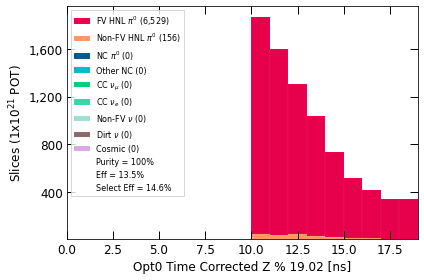

In [238]:
width = 19.02

hist, bins = plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'mod_t', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 19, xnbin = 19,
                    xtitle = 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]'
                    )
plt.show()

In [239]:
df_hnl

,run,subrun,event,slc_flux_weight_expskin,slc_flux_weight_horncurrent,slc_flux_weight_kminus,slc_flux_weight_kplus,slc_flux_weight_kzero,slc_flux_weight_nucleoninexsec,slc_flux_weight_nucleonqexsec,...,slc_flux_weight_piminus,slc_flux_weight_pioninexsex,slc_flux_weight_pionqexsec,slc_flux_weight_piontotxsec,slc_flux_weight_piplus,slc_idx,scale_pot,mod_t,slc_comp,slc_true_event_type
0,1,102,16,"[1.0020531, 0.99668956, 1.0019937, 0.9968406, ...","[0.9968436, 1.0159186, 0.99707335, 0.9959825, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9712605, 1.0597178, 0.82552, 1.0046408, 1.0...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0012821, 0.99922746, 1.0013212, 1.002096, 1...","[0.9923964, 0.9900148, 1.0705224, 1.0803664, 1...",...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0172889, 1.0264857, 1.0309825, 1.0311882, 0...","[1.00309, 1.0032315, 1.00057, 1.0029105, 1.002...","[1.010372, 1.005092, 0.9994057, 0.99696606, 0....","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0,2.402045,11.261490,0.966434,0
1,1,102,16,"[1.0020531, 0.99668956, 1.0019937, 0.9968406, ...","[0.9968436, 1.0159186, 0.99707335, 0.9959825, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9712605, 1.0597178, 0.82552, 1.0046408, 1.0...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0012821, 0.99922746, 1.0013212, 1.002096, 1...","[0.9923964, 0.9900148, 1.0705224, 1.0803664, 1...",...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0172889, 1.0264857, 1.0309825, 1.0311882, 0...","[1.00309, 1.0032315, 1.00057, 1.0029105, 1.002...","[1.010372, 1.005092, 0.9994057, 0.99696606, 0....","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0,2.402045,11.261490,0.966434,0
2,1,102,23,"[1.0054781, 0.99116725, 1.0053195, 0.9915702, ...","[0.9915626, 1.0119011, 0.9921768, 0.98926085, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9434989, 1.0611484, 0.8208608, 1.0272764, 1...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.99956006, 0.99985635, 0.99954665, 0.9992807...","[0.9921489, 0.9896897, 1.0608282, 1.069319, 1....",...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.009227, 1.0141354, 1.0165353, 1.0166452, 0....","[0.9742304, 0.9730511, 0.99524593, 1.0005001, ...","[0.9832385, 0.9917712, 0.9995766, 0.99783874, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1,2.402045,11.056201,0.897040,0
3,1,120,5,"[1.0188938, 0.9695363, 1.0183464, 0.97092605, ...","[0.98806584, 1.0098468, 0.9889346, 0.98481023,...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9830383, 1.0612191, 0.8281716, 0.9943897, 1...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9851323, 0.9921327, 0.98467886, 0.97569305,...","[0.9938981, 0.9919868, 1.061552, 1.0701439, 1....",...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9855358, 0.9778416, 0.97407955, 0.97390735,...","[0.9947272, 0.99448586, 0.99902725, 0.98707706...","[0.99945503, 0.99973243, 1.0001392, 1.000711, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0,2.402045,14.950912,0.985107,0
4,1,120,31,"[1.0338795, 0.945374, 1.0328981, 0.94786596, 1...","[0.9792214, 1.0111783, 0.980734, 0.973553, 0.9...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0050492, 1.0617471, 0.83106273, 0.96417606,...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0130506, 0.99372923, 1.0134486, 1.0213361, ...","[0.99240124, 0.99002105, 1.044451, 1.0506558, ...",...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.950419, 0.9240445, 0.9111487, 0.9105585, 0....","[1.0025872, 1.0027056, 1.0004773, 0.9966456, 0...","[0.98568445, 0.99297196, 0.9949046, 0.97398806...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1,2.402045,10.457285,0.857441,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3387,1,998,48,"[0.9751231, 1.0401106, 0.9758438, 1.0382807, 0...","[0.9993268, 1.0146301, 0.9993758, 0.9991432, 0...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0

<h1>Statistics Uncertainty</h1>

<h3>Scaling to ~10 events for hypothesis testing </h3>

In [240]:
simU = 1e-7
plotU = getUfromScaleFactor(simU, 80)

scaleFit= 1/100
fitU = getUfromScaleFactor(plotU, scaleFit)


print("Simulated U = " + str(simU))
print("Plot U = " + str(plotU))
print("Fit U = " + str(fitU))

Simulated U = 1e-07
Plot U = 8.944271909999158e-07
Fit U = 8.944271909999159e-08


In [241]:
df_hnl['scaleFit'] = scaleFit

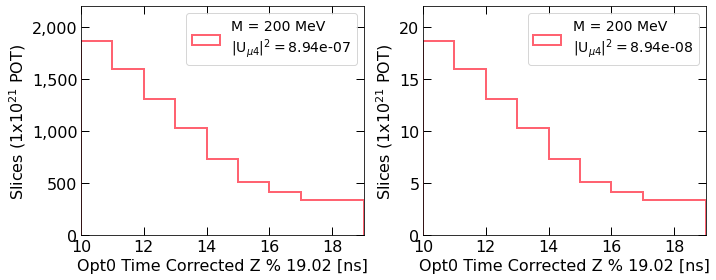

In [242]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,4))

xmin, xmax, xnbin = 0, 19, 19
xlimmin, xlimmax = xmin, xmax

pltdf = df_hnl['mod_t']
weights = df_hnl['scale_pot'] 

#-----------------------------------------------------------------#
n_stat_noScale, bins, _ = ax1.hist(
                            pltdf,
                            bins = np.arange(xmin, xmax+(xmax-xmin)/xnbin, (xmax-xmin)/xnbin),
                            weights = weights,
                            density = False,
                            histtype="step",
                            edgecolor = col_dict["Flamingo"],
                            linestyle = "-",
                            linewidth = 2,
                            label = "M = 200 MeV\n|U$_{\mu4}|^{2} = $" +str("{:.3g}".format(plotU))
                        )
ax1.set_xlim(10, 19)
ax1.set_ylim(0, 2200)
ax1.legend(loc = 'upper right',fontsize = 14)
plot_tick(ax1, 16)
plot_title(ax1, "", 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]',  "Slices (1x10$^{21}$ POT)", 16)

#-----------------------------------------------------------------#
weights = df_hnl['scale_pot'] * df_hnl['scaleFit']
n_stat, _, _ = ax2.hist(
                            pltdf,
                            bins = np.arange(xmin, xmax+(xmax-xmin)/xnbin, (xmax-xmin)/xnbin),
                            weights = weights,
                            density = False,
                            histtype="step",
                            edgecolor = col_dict["Flamingo"],
                            linestyle = "-",
                            linewidth = 2,
                            label = "M = 200 MeV\n|U$_{\mu4}|^{2} = $" +str("{:.3g}".format(fitU))
                        )
ax2.set_xlim(10, 19)
ax2.set_ylim(0, 2200*scaleFit)
ax2.legend(loc = 'upper right',fontsize = 14)
plot_tick(ax2, 16)
plot_title(ax2, "", 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]',  "Slices (1x10$^{21}$ POT)", 16)

fig.tight_layout()

plt.show()

In [243]:
print(n_stat)
n_stat = n_stat[10:]
stats_arr = 1/np.sqrt(n_stat)
print(stats_arr)

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         18.63986556 15.97359613
 13.06712225 10.35281193  7.30221537  5.16439574  4.13151659  3.36286234
  3.36286234]
[0.23162136 0.25020654 0.27663685 0.31079272 0.37006046 0.44003806
 0.49197751 0.5453125  0.5453125 ]


In [168]:
print(n_stat_noScale)
n_stat_noScale = n_stat_noScale[10:]
stats_noScale_arr = 1/np.sqrt(n_stat_noScale)
print(stats_noScale_arr)

[   0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
 1863.98655559 1597.35961272 1306.71222454 1035.2811926   730.22153724
  516.43957404  413.15165923  336.28623426  336.28623426]
[0.02316214 0.02502065 0.02766368 0.03107927 0.03700605 0.04400381
 0.04919775 0.05453125 0.05453125]


In [169]:
#make array for plotting
n_stat_noScale_plot = np.insert(n_stat_noScale, 0, 0)
bins = bins[10:]
bins_mid = np.convolve(bins, [0.5, 0.5], "valid")

n_stat_plot = np.insert(n_stat, 0, 0)

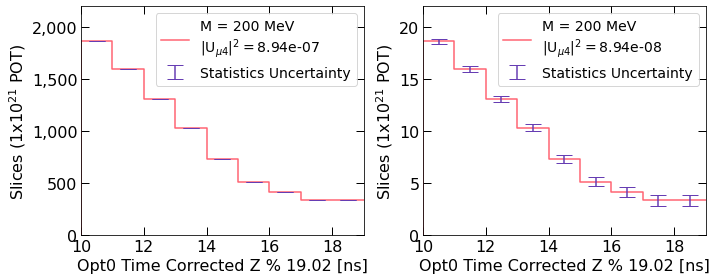

In [184]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,4))

xmin, xmax, xnbin = 0, 19, 19
xlimmin, xlimmax = xmin, xmax

pltdf = df_hnl['mod_t']
weights = df_hnl['scale_pot'] 

#-----------------------------------------------------------------#
#nStat NoScale
ax1.step(bins, n_stat_noScale_plot, color = col_dict['Flamingo']
         , label =  "M = 200 MeV\n|U$_{\mu4}|^{2} = $" +str("{:.3g}".format(plotU))
        )

ax1.errorbar(bins_mid, n_stat_noScale, stats_noScale_arr,
            ls='none',
            color = col_dict['Mauve'],
            capsize=8
            ,label = "Statistics Uncertainty"
           )

ax1.set_xlim(10, 19)
ax1.set_ylim(0, 2200)
ax1.legend(loc = 'upper right',fontsize = 14)
plot_tick(ax1, 16)
plot_title(ax1, "", 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]',  "Slices (1x10$^{21}$ POT)", 16)

#-----------------------------------------------------------------#
weights = df_hnl['scale_pot'] * df_hnl['scaleFit']
ax2.step(bins, n_stat_plot, color = col_dict['Flamingo']
         , label =  "M = 200 MeV\n|U$_{\mu4}|^{2} = $" +str("{:.3g}".format(fitU))
        )

ax2.errorbar(bins_mid, n_stat, stats_arr,
            ls='none',
            color = col_dict['Mauve'],
            capsize=8
            ,label = "Statistics Uncertainty"
           )


ax2.set_xlim(10, 19)
ax2.set_ylim(0, 2200*scaleFit)
ax2.legend(loc = 'upper right',fontsize = 14)
plot_tick(ax2, 16)
plot_title(ax2, "", 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]',  "Slices (1x10$^{21}$ POT)", 16)

fig.tight_layout()

if ifSave:
    plt.savefig(savePath+str("beam_bucket_scale_statistics.png"), dpi=200)
    
plt.show()

<h1>Flux Weights</h1>

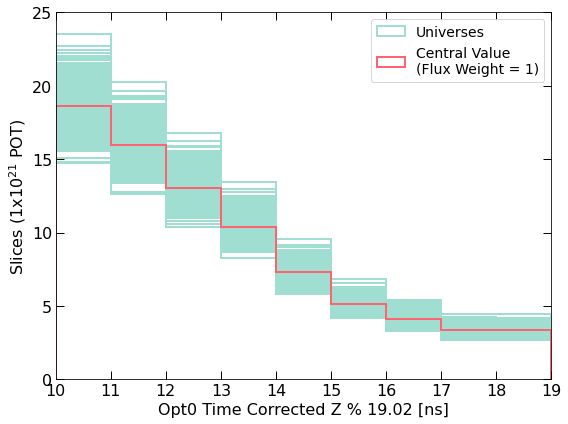

In [186]:
n_arr = []

fig, ax = plt.subplots(1,1, figsize = (8,6))

xmin, xmax, xnbin = 0, 19, 19
xlimmin, xlimmax = xmin, xmax

pltdf = df_hnl['mod_t']

for i in range(0, 1000):
    weights = df_hnl['flxw_{}'.format(i)] *  df_hnl['scale_pot'] * df_hnl['scaleFit']   
    label = ''
    if i == 0:
        label = "Universes"
        
    n, _, _ = ax.hist(
                            pltdf,
                            bins = np.arange(xmin, xmax+(xmax-xmin)/xnbin, (xmax-xmin)/xnbin),
                            weights = weights,
                            density = False,
                            histtype="step",
                            edgecolor = col_dict["PastelGreen"],
                            linestyle = "-",
                            linewidth = 2,
                            label = label
                        )
    n_arr.append(n)

weights = df_hnl['scale_pot'] * df_hnl['flxw_nom'] * df_hnl['scaleFit']
    
n_cv, bins, _ = ax.hist(
                            pltdf,
                            bins = np.arange(xmin, xmax+(xmax-xmin)/xnbin, (xmax-xmin)/xnbin),
                            weights = weights,
                            density = False,
                            histtype="step",
                            edgecolor = col_dict["Flamingo"],
                            linestyle = "-",
                            linewidth = 2,
                            label = "Central Value \n(Flux Weight = 1)"
                        )

ax.legend(loc = 'upper right',fontsize = 14)

plot_tick(ax, 16)
plot_title(ax, "", 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]',  "Slices (1x10$^{21}$ POT)", 16)

ax.set_xlim(10, 19)
ax.set_ylim(0, 2500*scaleFit)
fig.tight_layout()

if ifSave:
    plt.savefig(savePath+str("beam_bucket_flux_weight_universe.png"), dpi=200)
plt.show()

<h3>Calculate Mean and Std</h3>

In [188]:
#check xbin range
print("xbins range")
print(bins)

n_arr = np.array(n_arr)
print("bins")
print(n_arr)
#check shape
print("shape")
print(n_arr.shape)

#transpose 
n_trans = np.transpose(n_arr)

#get mean
mean_arr = n_trans.mean(axis=1)
mean_arr
print("mean")
print(mean_arr)

#get std
std_arr = np.array(n_trans).std(1)
std_arr
print("std")
print(std_arr)

xbins range
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19.]
bins
[[0.         0.         0.         ... 4.05368653 3.37172446 3.29622119]
 [0.         0.         0.         ... 4.34885212 3.60888928 3.56078892]
 [0.         0.         0.         ... 3.91317305 3.07930198 3.03523441]
 ...
 [0.         0.         0.         ... 4.30463661 3.54333047 3.52447397]
 [0.         0.         0.         ... 4.35665068 3.5603243  3.50662557]
 [0.         0.         0.         ... 4.39566422 3.39566589 3.39609359]]
shape
(1000, 19)
mean
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         18.60883239 16.0421419
 13.1780136  10.49806909  7.42249793  5.28543639  4.18167441  3.43928175
  3.38922699]
std
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         1.23132667 1.05858028
 0.89070936 0.72585306 0.52270672 0.38466216 0.30198156 0.24228799
 0.24556319]


<h3>Keep only relevant bins</h3>

In [189]:
print(mean_arr[10:])
print(std_arr[10:])
print(n_cv[10:])
print(bins[10:])

n_cv = n_cv[10:]
bins = bins[10:]

mean_arr = mean_arr[10:]
std_arr = std_arr[10:]

[18.60883239 16.0421419  13.1780136  10.49806909  7.42249793  5.28543639
  4.18167441  3.43928175  3.38922699]
[1.23132667 1.05858028 0.89070936 0.72585306 0.52270672 0.38466216
 0.30198156 0.24228799 0.24556319]
[18.63986556 15.97359613 13.06712225 10.35281193  7.30221537  5.16439574
  4.13151659  3.36286234  3.36286234]
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]


In [190]:
#make array for plotting
n_cv_plot = np.insert(n_cv, 0, 0)

bins_mid = np.convolve(bins, [0.5, 0.5], "valid")

mean_arr_plot = np.insert(mean_arr, 0, 0)

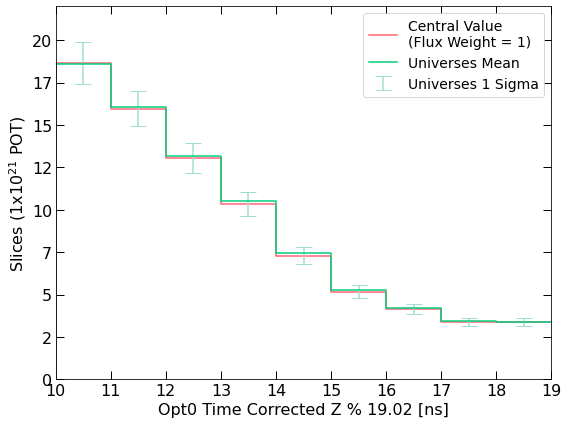

In [191]:
fig, ax = plt.subplots(1, 1, figsize = (8, 6))

#nominal
ax.step(bins, n_cv_plot, color = col_dict['Flamingo'], label = "Central Value \n(Flux Weight = 1)")

#universe 1 sigma
ax.errorbar(bins_mid, n_cv, std_arr,
            ls='none',
            color = col_dict['PastelGreen'],
            capsize=8
            ,label = "Universes 1 Sigma"
           )

#central value
ax.step(bins, mean_arr_plot, color = col_dict['MintGreen'], label = "Universes Mean")

#tick stuff
plot_title(ax,"", 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]', "Slices (1x10$^{21}$ POT)", 16)
plot_tick(ax, 16)

ax.legend(loc="best", fontsize=14, fancybox=True, ncol = 1)

ax.set_xlim(10,19)
ax.set_ylim(0, 2200*scaleFit)

fig.tight_layout()
if ifSave:
    plt.savefig(savePath+str("beam_bucket_flux_weight_mean_std.png"), dpi=200)
plt.show()

<h1>Plot Everything</h1>

<h3>Make Fractional Error</h3>

In [192]:
stats_frac_arr = stats_arr / n_cv * 100
std_frac_arr = std_arr / n_cv * 100

In [193]:
print(stats_frac_arr)
print(std_frac_arr)

[ 1.24261284  1.56637575  2.1170449   3.00201262  5.06778338  8.52061081
 11.90791561 16.21572479 16.21572479]
[6.60587742 6.627063   6.81641559 7.01116822 7.15819375 7.44834781
 7.30921812 7.20481444 7.30220763]


In [194]:
#make array for plotting
stats_frac_plot = np.insert(stats_frac_arr, 0, 0)
std_frac_plot = np.insert(std_frac_arr, 0, 0)

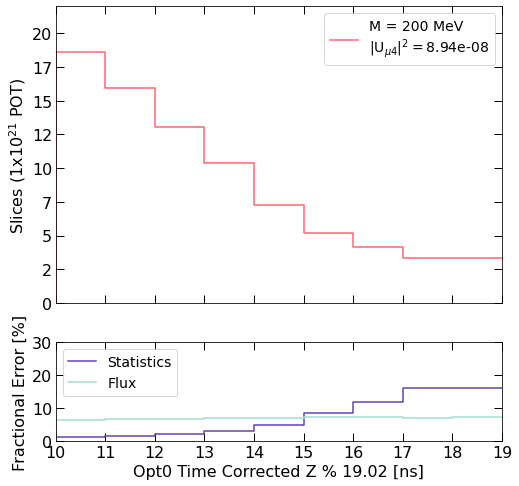

In [196]:
f, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, figsize = (8, 8), sharex = True)

#nominal
ax1.step(bins, n_cv_plot, color = col_dict['Flamingo']
         , label = "M = 200 MeV\n|U$_{\mu4}|^{2} = $" +str("{:.3g}".format(fitU))
        )

ax2.step(bins, stats_frac_plot, color = col_dict['Mauve'], label = "Statistics")
ax2.step(bins, std_frac_plot, color = col_dict['PastelGreen'], label = "Flux")

#tick stuff
plot_title(ax1,"", '',"Slices (1x10$^{21}$ POT)" , 16)
plot_tick(ax1, 16)

plot_title(ax2,"", 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]', "Fractional Error [%]", 16)
plot_tick(ax2, 16)

ax1.legend(loc="best", fontsize=14, fancybox=True, ncol = 1)
ax2.legend(loc="best", fontsize=14, fancybox=True, ncol = 1)

ax1.set_xlim(10,19)
ax1.set_ylim(0, 2200*scaleFit)

ax2.set_xlim(10,19)
ax2.set_ylim(0, 30)

fig.tight_layout()

if ifSave:
    plt.savefig(savePath+str("beam_bucket_fractional_error.png"), dpi=200)
plt.show()

<h1>Make Fake Background For Now</h1>

In [129]:
bkg = np.zeros(len(n_cv))

In [130]:
print(bkg)
print(n_cv)

[0. 0. 0. 0. 0. 0. 0. 0. 0.]
[18.63986556 15.97359613 13.06712225 10.35281193  7.30221537  5.16439574
  4.13151659  3.36286234  3.36286234]


<h1>Save Array</h1>

In [132]:
hnl_dict= {
    '200': {
        'U': fitU,
        'sig': n_cv,
        'sig_flux': std_arr,
        'sig_stats': stats_arr,
        'bkg': bkg,
        'bkg_flux': bkg,
        'bkg_stats': bkg
    }
}

In [133]:
print(hnl_dict)

{'200': {'U': 8.944271909999159e-08, 'sig': array([18.63986556, 15.97359613, 13.06712225, 10.35281193,  7.30221537,
        5.16439574,  4.13151659,  3.36286234,  3.36286234]), 'sig_flux': array([1.23132667, 1.05858028, 0.89070936, 0.72585306, 0.52270672,
       0.38466216, 0.30198156, 0.24228799, 0.24556319]), 'sig_stats': array([0.23162136, 0.25020654, 0.27663685, 0.31079272, 0.37006046,
       0.44003806, 0.49197751, 0.5453125 , 0.5453125 ]), 'bkg': array([0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'bkg_flux': array([0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'bkg_stats': array([0., 0., 0., 0., 0., 0., 0., 0., 0.])}}


In [134]:
np.save('./HNL.npy', hnl_dict) 